In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
home_dir = '/data/LiftFly3D/prism/'
data_dir = '/mnt/NAS/SG/prism_data/191125_PR/Fly1/001_prism/behData/images/'

border_width = 105
threshold = 45
bbox_width = 550
horiz_crop = 440

In [2]:
#crop loc file
def read_crop_pos(file):
    f=open(file, "r")
    contents =f.readlines()
    im_file = []
    x_pos = []
    for i in range(4,len(contents)):
        line = contents[i][:-1].split(' ')
        im_file.append(line[0])
        x_pos.append(line[1])
        
    return im_file, x_pos

im_file, x_pos = read_crop_pos(data_dir + 'crop_location_prism_data_191125_PR_Fly1.txt')

In [3]:
#predicted locations
bottom_pos = pd.read_hdf(home_dir + 'prediction_filtered_Fly1_001.h5',key='bottom')
side_pos = pd.read_hdf(home_dir + 'prediction_filtered_Fly1_001.h5',key='side')

index = side_pos.index.values
i = 1

bottom_x = bottom_pos.loc[index[i],(slice(None),'x')].values
bottom_y = bottom_pos.loc[index[i],(slice(None),'y')].values
side_x = side_pos.loc[index[i],(slice(None),'x')].values
side_y = side_pos.loc[index[i],(slice(None),'y')].values

im = plt.imread(data_dir + im_file[index[i]])
im_crop_bottom = plt.imread(data_dir + 'bottom_view_prism_data_191125_PR_Fly1/' + im_file[index[i]])
im_crop_side = plt.imread(data_dir + 'side_view_prism_data_191125_PR_Fly1/' + im_file[index[i]])

In [4]:
#select corresponding images
imgs = [im_file[j] for j in index]
imgs_bottom = [im_file[j] for j in index]
imgs_side = [im_file[j] for j in index]
x_crop = [x_pos[j] for j in index]

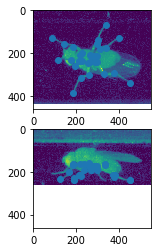

In [5]:
#cropped image
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

ax1.imshow(im_crop_bottom)
ax2.imshow(im_crop_side)

ax1.scatter(bottom_x - int(x_crop[i]), bottom_y)
ax2.scatter(side_x - int(x_crop[i]), side_y)

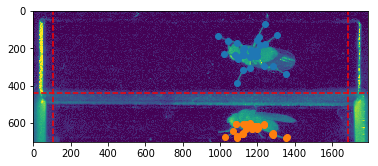

In [6]:
#full image
plt.imshow(im)
plt.axhline(horiz_crop, color="red", linestyle="--")
plt.axvline(border_width, color="red", linestyle="--")
plt.axvline(im.shape[1]-border_width, color="red", linestyle="--")

plt.scatter(border_width + bottom_x, bottom_y)
plt.scatter(border_width + side_x, horiz_crop + side_y)